In [2]:
# import from

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import folium
import warnings
warnings.filterwarnings("ignore")

# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [3]:
fruits = pd.read_csv('../Data/fruites.csv')

In [4]:
fruits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   length  49 non-null     float64
 1   weight  49 non-null     float64
 2   name    49 non-null     object 
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


> fruites는 35개의 apple(1) 와 14개의 berry(0)의 data로 구성되어 있음

In [5]:
apple = fruits[0:35]
apple.tail()

,length,weight,name
30,38.5,920.0,apple
31,38.5,955.0,apple
32,39.5,925.0,apple
33,41.0,975.0,apple
34,41.0,950.0,apple


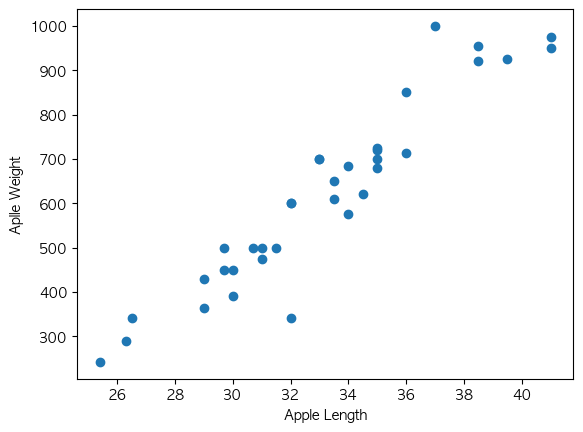

In [6]:
# 산포도로 확인하기
plt.scatter(apple['length'],apple['weight'],)

plt.xlabel('Apple Length')
plt.ylabel('Aplle Weight')
plt.show()

In [7]:
berry = fruits[35:]
berry.head()

,length,weight,name
35,9.8,6.7,berry
36,10.5,7.5,berry
37,10.6,7.0,berry
38,11.0,9.7,berry
39,11.2,9.8,berry


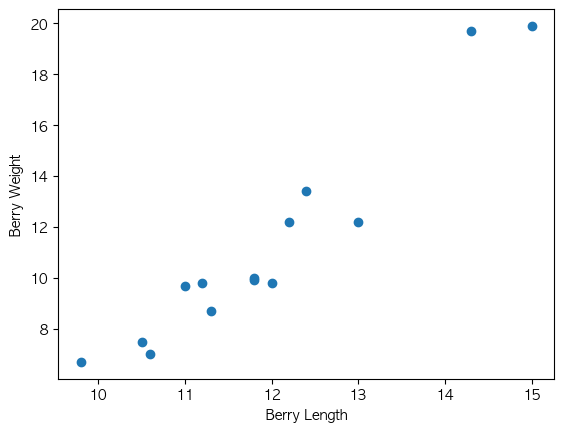

In [8]:
# 산포도로 확인하기
plt.scatter(berry['length'],berry['weight'],)

plt.xlabel('Berry Length')
plt.ylabel('Berry Weight')
plt.show()

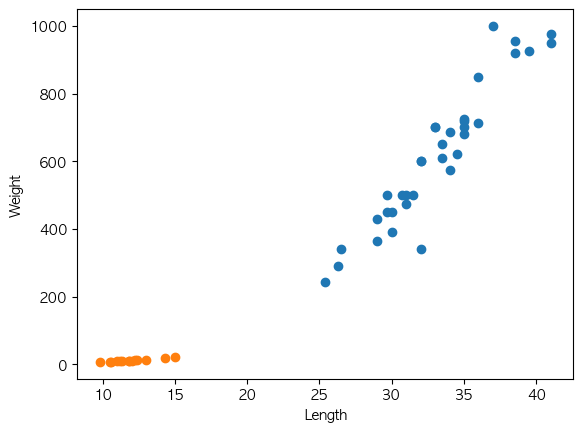

In [9]:
# 산포도로 확인하기
plt.scatter(apple.length,apple.weight)
plt.scatter(berry.length,berry.weight)

plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

---
### ML을 위한 데이터 준비
- Feature Data 와 Target Data의 분리

In [10]:
fruitsData = fruits[['length','weight']]
fruitsData.head()

,length,weight
0,25.4,242.0
1,26.3,290.0
2,26.5,340.0
3,29.0,363.0
4,29.0,430.0


In [11]:
fruitsTarget = fruits['name']
fruitsTarget.head()

0    apple
1    apple
2    apple
3    apple
4    apple
Name: name, dtype: object

---
### 최근접이웃(KNN : K Nearest Neighbors) 분류 알고리즘 
- 지도학습 

In [12]:
from sklearn.neighbors import KNeighborsClassifier # 분류할 꺼니까 classifier

In [13]:
# kn = KNeighborsClassifier(n_neighbors=3) 수동으로 값을 줄 수 있음
kn = KNeighborsClassifier() # default =5

In [14]:
# 학습 시키기 fit
kn.fit(fruitsData, fruitsTarget)

KNeighborsClassifier()

In [15]:
# 정확성
kn.score(fruitsData, fruitsTarget)

1.0

In [16]:
# 길이가 30cm이고 무게가 600g인 것은 무엇인가?
kn.predict([[30,600]])

array(['apple'], dtype=object)

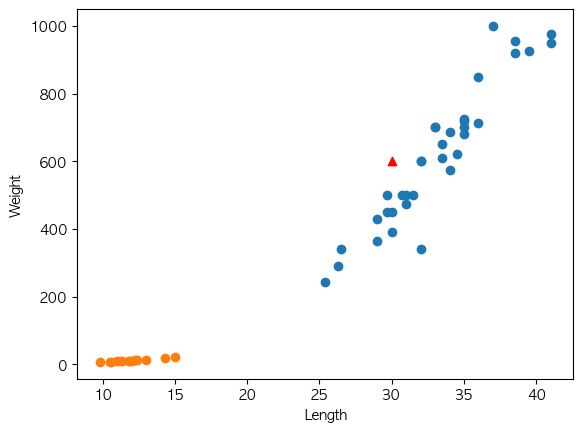

In [17]:
# 산포도로 확인하기
plt.scatter(apple.length,apple.weight)
plt.scatter(berry.length,berry.weight)
plt.scatter(30,600,marker='^', c='red')

plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()